# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.030248e+01     8.747024e+00
 * time: 0.0018770694732666016
     1     2.968775e+01     5.132387e+00
 * time: 0.007955074310302734
     2     2.116949e+01     6.328166e+00
 * time: 0.013586997985839844
     3     1.644420e+01     5.914442e+00
 * time: 0.01831197738647461
     4     1.136507e+01     2.822427e+00
 * time: 0.02310800552368164
     5     9.390678e+00     1.081443e+00
 * time: 0.027749061584472656
     6     8.817979e+00     1.229799e+00
 * time: 0.03155207633972168
     7     8.531996e+00     6.527618e-01
 * time: 0.03604388236999512
     8     8.365272e+00     6.069363e-01
 * time: 0.04048299789428711
     9     8.326547e+00     8.483700e-01
 * time: 0.04413294792175293
    10     8.314085e+00     1.280235e+00
 * time: 0.04780006408691406
    11     8.308615e+00     9.935232e-01
 * time: 0.08905696868896484
    12     8.251828e+00     6.329018e-01
 * time: 0.09205007553100586
    13     8.198564e+00     7.548617e-01
 * 

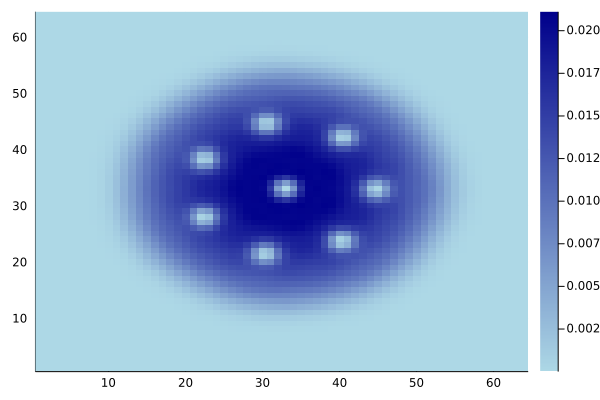

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)